Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.1628 - val_loss: 0.1445
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0515 - val_loss: 0.0292
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0178 - val_loss: 0.0215
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0125 - val_loss: 0.0221
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - val_loss: 0.0180
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0115 - val_loss: 0.0188
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0119 - val_loss: 0.0178
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0120 - val_loss: 0.0180
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0107 - val_loss: 0.0180
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0114 - val_loss: 0.0178
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0110 - val_loss: 0.0182
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


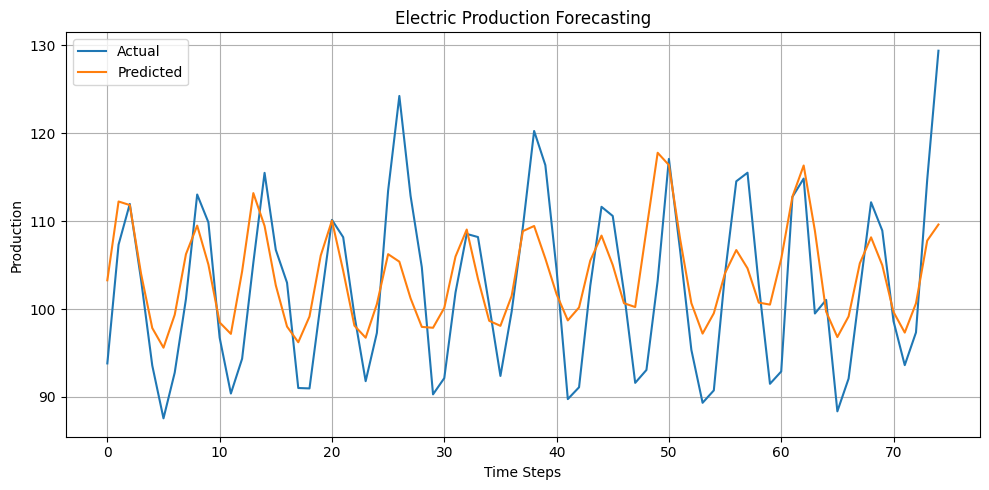

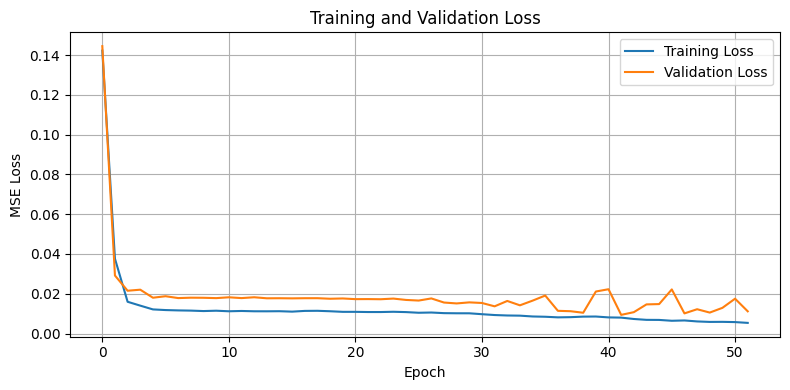

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('/content/Electric_Production.csv')

# Use only the production values
data = df['IPG2211A2N'].values.astype('float32')

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 24  # 24 months (2 years)
X, y = create_sequences(data_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # reshape for LSTM

# Train-test split
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Add EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Predict
y_pred = model.predict(X_test)

# Inverse transform predictions
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Electric Production Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
